$\Huge{\text{Linear Regression with Regularizers}}$

In this session, we shall learn about linear regression when we impose regularizers on the parameters.


Let us first consider a sample data, which will be useful for our study of linear regression with regularizers.

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import numpy as np
import seaborn as sns
# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet.
Concrete is the most important material in civil engineering. The
concrete compressive strength is a highly nonlinear function of age and
ingredients. These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.


In [ ]:
#Let us explore the data and the description
#Get the data from the web
sac_data = pd.read_csv("cementdata.csv")
#print the first few rows of the data
sac_data.head()


,cement_kg_in_cubicmetre_mixture,Blast_Furnace_Slag_kg_in_cubicmetre_mixture,Fly_Ash_kg_in_cubicmetre_mixture,Water_kg_in_cubicmetre_mixture,Superplasticizer_kg_in_cubicmetre_mixture,Coarse_Aggregate_kg_in_cubicmetre_mixture,Fine_Aggregate_kg_in_cubicmetre_mixture,Age_days,Concrete_compressive_strength_megapascals
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
sac_data.columns

Index(['cement_kg_in_cubicmetre_mixture',
       'Blast_Furnace_Slag_kg_in_cubicmetre_mixture',
       'Fly_Ash_kg_in_cubicmetre_mixture', 'Water_kg_in_cubicmetre_mixture',
       'Superplasticizer_kg_in_cubicmetre_mixture',
       'Coarse_Aggregate_kg_in_cubicmetre_mixture',
       'Fine_Aggregate_kg_in_cubicmetre_mixture', 'Age_days',
       'Concrete_compressive_strength_megapascals'],
      dtype='object')

In [ ]:
sac_data

,cement_kg_in_cubicmetre_mixture,Blast_Furnace_Slag_kg_in_cubicmetre_mixture,Fly_Ash_kg_in_cubicmetre_mixture,Water_kg_in_cubicmetre_mixture,Superplasticizer_kg_in_cubicmetre_mixture,Coarse_Aggregate_kg_in_cubicmetre_mixture,Fine_Aggregate_kg_in_cubicmetre_mixture,Age_days,Concrete_compressive_strength_megapascals
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
sac_data.isnull().sum()

cement_kg_in_cubicmetre_mixture                0
Blast_Furnace_Slag_kg_in_cubicmetre_mixture    0
Fly_Ash_kg_in_cubicmetre_mixture               0
Water_kg_in_cubicmetre_mixture                 0
Superplasticizer_kg_in_cubicmetre_mixture      0
Coarse_Aggregate_kg_in_cubicmetre_mixture      0
Fine_Aggregate_kg_in_cubicmetre_mixture        0
Age_days                                       0
Concrete_compressive_strength_megapascals      0
dtype: int64

In [ ]:
sac_data.shape

(1030, 9)

In [ ]:
##Counting number of missing values in each column
for col in sac_data.columns.values:
  val = set(sac_data[col])
  null_val = sum(pd.isna(sac_data[col]))
  print(col + ': ' + str(sac_data[col].dtypes) + ', ' + str(len(val)) + ' unique values, ' + str(null_val) + ' null values!')

cement_kg_in_cubicmetre_mixture: float64, 278 unique values, 0 null values!
Blast_Furnace_Slag_kg_in_cubicmetre_mixture: float64, 185 unique values, 0 null values!
Fly_Ash_kg_in_cubicmetre_mixture: float64, 156 unique values, 0 null values!
Water_kg_in_cubicmetre_mixture: float64, 195 unique values, 0 null values!
Superplasticizer_kg_in_cubicmetre_mixture: float64, 111 unique values, 0 null values!
Coarse_Aggregate_kg_in_cubicmetre_mixture: float64, 284 unique values, 0 null values!
Fine_Aggregate_kg_in_cubicmetre_mixture: float64, 302 unique values, 0 null values!
Age_days: int64, 14 unique values, 0 null values!
Concrete_compressive_strength_megapascals: float64, 845 unique values, 0 null values!


# **Finding which variables are correlated-**

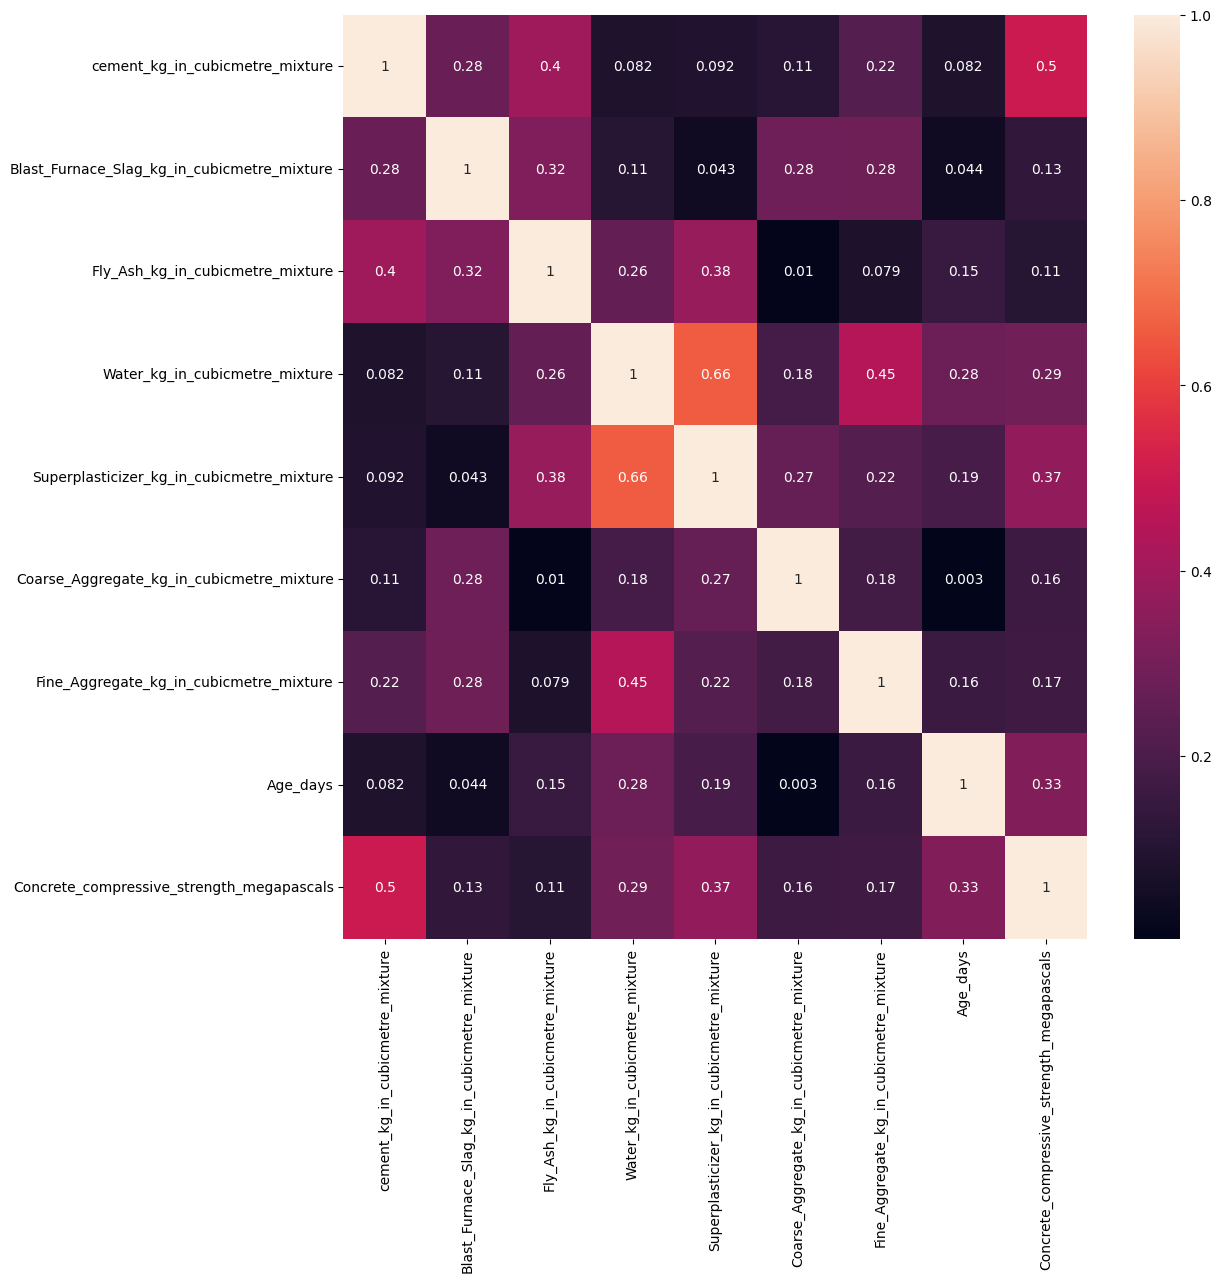

In [ ]:
corr_matrix = sac_data.corr(method = 'pearson') #here, we are using pearson coefficient
corr_matrix_testing = sac_data.corr(method = 'pearson')
fig,ax = plt.subplots(figsize = (12,12))
sns.heatmap(abs(corr_matrix),annot = True) #plotting the heatmap
plt.show()

**Note:** Please see that while plotting the correlation matrix, we have converted the negative correlation too into the positive quantities because our main goal is to find out the variables which are redundant in the dataset (Which means they can be either highly positively correlated or negatively correlated with any other variable or feature).

**Dropping the variables that have a correlation greater than a certain threshold-**

In [ ]:
def correlation(data,threshold): #defining a function that will give us the list of highly correlated variables
  correlated_columns =[]
  correlated_matrix = corr_matrix
  for i in range(len(correlated_matrix.columns)):
    for j in range(i):
      if (correlated_matrix.iloc[i,j]) >= threshold:
        colname = correlated_matrix.columns[i]
        correlated_columns.append(colname)
  return correlated_columns

corr_features = correlation(sac_data,0.8)
print("The number of corelated features are = ",(len(corr_features)))
print("The index of correlated features are = ", corr_features)
sac_data = sac_data.drop(corr_features,axis = 1)

The number of corelated features are =  0
The index of correlated features are =  []


In [ ]:
sac_data

,cement_kg_in_cubicmetre_mixture,Blast_Furnace_Slag_kg_in_cubicmetre_mixture,Fly_Ash_kg_in_cubicmetre_mixture,Water_kg_in_cubicmetre_mixture,Superplasticizer_kg_in_cubicmetre_mixture,Coarse_Aggregate_kg_in_cubicmetre_mixture,Fine_Aggregate_kg_in_cubicmetre_mixture,Age_days,Concrete_compressive_strength_megapascals
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
sac_data = sac_data.astype(float)

**Shifting the dependent column to the first position-**

In [ ]:
# shift column 'G1' to first position
G1_column = sac_data.pop('Concrete_compressive_strength_megapascals') #collect the contents of Concrete_compressive_strength_megapascals  column into a temporary object

# insert column into the dataframe using insert(position,column_name,column_contents) function
sac_data.insert(0, 'Concrete_compressive_strength_megapascals', G1_column) #Insert as first column, so position is 0

print("After shifting Concrete_compressive_strength_megapascals column to first position")
sac_data.head()

After shifting Concrete_compressive_strength_megapascals column to first position


,Concrete_compressive_strength_megapascals,cement_kg_in_cubicmetre_mixture,Blast_Furnace_Slag_kg_in_cubicmetre_mixture,Fly_Ash_kg_in_cubicmetre_mixture,Water_kg_in_cubicmetre_mixture,Superplasticizer_kg_in_cubicmetre_mixture,Coarse_Aggregate_kg_in_cubicmetre_mixture,Fine_Aggregate_kg_in_cubicmetre_mixture,Age_days
0,79.99,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,61.89,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,40.27,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0
3,41.05,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0
4,44.30,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0


In [ ]:
sac_data.shape

(1030, 9)

**Making a Train-Test-Validation split..**

In [ ]:
sac_train_initial = sac_data.sample(frac=0.8,random_state=200)
sac_test = sac_data.drop(sac_train_initial.index) #axis=0 by default, hence dropping rows using indices.

len(sac_train_initial), len(sac_test)

(824, 206)

In [ ]:
sac_test

,Concrete_compressive_strength_megapascals,cement_kg_in_cubicmetre_mixture,Blast_Furnace_Slag_kg_in_cubicmetre_mixture,Fly_Ash_kg_in_cubicmetre_mixture,Water_kg_in_cubicmetre_mixture,Superplasticizer_kg_in_cubicmetre_mixture,Coarse_Aggregate_kg_in_cubicmetre_mixture,Fine_Aggregate_kg_in_cubicmetre_mixture,Age_days
0,79.99,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
2,40.27,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0
6,43.70,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0
7,36.45,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0
10,38.07,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90.0
...,...,...,...,...,...,...,...,...,...
1011,43.80,287.3,120.5,93.9,187.6,9.2,904.4,695.9,28.0
1013,40.87,355.9,0.0,141.6,193.3,11.0,801.4,778.4,28.0
1022,41.54,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28.0
1025,44.28,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0


In [ ]:
sac_train = sac_train_initial.sample(frac=0.8,random_state=200)
sac_val = sac_train_initial.drop(sac_train.index)

len(sac_train), len(sac_test), len(sac_val)

(659, 206, 165)

$\large{\text{How to estimate the parameters } \beta_j, j=0,1,\ldots,d?}$

One way to estimate the values of $\beta_j, j=0,1,\ldots,d$ is by minimizing the sum of squared errors given by:
$
\begin{align}
\min \sum_{i=1}^{n} (e^i)^2
\end{align}
$
which can be equivalently written as the following optimization problem:
$
\begin{align}
\min_{\beta_0,\beta_1,\ldots,\beta_d} \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2.
\end{align}
$

$\textbf{Note}$ that in the high dimensional case as well, the optimization problem is called the ordinary least squares (OLS) problem, and the term $\sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2$ is called the OLS objective function and we will denote the OLS objective by:

$
\begin{align}
L(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2.
\end{align}
$

$\Large{\text{Solving the OLS optimization problem}}:$

Assuming the responses $y^1,y^2,\ldots,y^n$ are present in a $n \times 1$ matrix represented as:

$
\mathbf{y}=\begin{bmatrix}
y^1 \\ y^2 \\ \vdots \\ y^n
\end{bmatrix}
$

and the predictor variables $\mathbf{x}^1,\mathbf{x}^2,\ldots,\mathbf{x}^d$ are placed in a $n\times (d+1)$ matrix represented as:

$
\mathbf{X}=\begin{bmatrix}
\leftarrow & \mathbf{x}^1 & \rightarrow & 1 \\
\leftarrow & \mathbf{x}^2 & \rightarrow & 1 \\
\leftarrow & \ldots & \rightarrow & 1  \\
\leftarrow & \mathbf{x}^n & \rightarrow & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
{x}_1^1 & {x}_2^1 &\ldots & {x}_d^1 & 1 \\
{x}_1^2 & {x}_2^2 &\ldots & {x}_d^2 & 1 \\
\vdots & \vdots & \ldots & \vdots \\
{x}_1^n & {x}_2^n &\ldots & {x}_d^n & 1
\end{bmatrix}
$
where note that the last column of matrix $\mathbf{X}$ contains a column of all ones. This column is useful to incorporate the effect of $\beta_0$ parameter in $\mathbf{X}$ matrix.

Similarly assume that
 we can write the coefficients $\beta_0,\beta_1,\ldots,\beta_d$ as a $(d+1)\times 1$ matrix represented as:

$
\mathbf{\beta} = \begin{bmatrix}
\beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \\ \beta_0
\end{bmatrix}.
$

Now we can write the objective function as:

$
L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2.
$

To solve

$
\min_\beta L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2,
$
we find the gradient with respect to $\beta$ and equate to zero.

Thus we get:

$
\begin{align}
\nabla_\beta L(\beta) &= \mathbf{0} \\
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta &= \mathbf{0} \\
\implies \beta = (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}&.
\end{align}
$

Note that the closed form expression for $\beta$ is valid only when $(\mathbf{X}^\top\mathbf{X})^{-1}$ is invertible. Otherwise we need to solve the system given by:

$
\mathbf{X}^\top\mathbf{X} \beta = \mathbf{X}^\top \mathbf{y}
$
using a solver.



$\Large{\text{Computing } \beta \text{ for the Concrete dataset}}:$

In [ ]:
#Let us now compute beta
n_train = len(sac_train) #number of data points in the train data set
print('number of data points in the training data set:',n_train)
n_test = len(sac_test) #number of data points in the test data set
print('number of data points in the testing data set:',n_test)
n_val = len(sac_val) #number of data points in the val data set
print('number of data points in the validation data set:',n_val)

number of data points in the training data set: 659
number of data points in the testing data set: 206
number of data points in the validation data set: 165


In [ ]:
cols = list(range(1,9)) #We need to take into account only the second column onwards in the predictor variables.
X_train = sac_train[sac_train.columns[cols]]
X_val = sac_val[sac_val.columns[cols]]
X_test = sac_test[sac_test.columns[cols]]

In [ ]:
X_train

,cement_kg_in_cubicmetre_mixture,Blast_Furnace_Slag_kg_in_cubicmetre_mixture,Fly_Ash_kg_in_cubicmetre_mixture,Water_kg_in_cubicmetre_mixture,Superplasticizer_kg_in_cubicmetre_mixture,Coarse_Aggregate_kg_in_cubicmetre_mixture,Fine_Aggregate_kg_in_cubicmetre_mixture,Age_days
262,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,56.0
619,254.0,0.0,0.0,198.0,0.0,968.0,863.0,180.0
292,182.0,45.2,122.0,170.2,8.2,1059.4,780.7,56.0
82,401.8,94.7,0.0,147.4,11.4,946.8,852.1,3.0
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7.0
...,...,...,...,...,...,...,...,...
666,192.0,288.0,0.0,192.0,0.0,929.8,716.1,3.0
217,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,56.0
277,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,56.0
39,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180.0


In [ ]:
#convert predictor variable columns into a numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()

In [ ]:
X_train

array([[ 212.6,    0. ,  100.4, ..., 1003.8,  903.8,   56. ],
       [ 254. ,    0. ,    0. , ...,  968. ,  863. ,  180. ],
       [ 182. ,   45.2,  122. , ..., 1059.4,  780.7,   56. ],
       ...,
       [ 251.4,    0. ,  118.3, ..., 1028.4,  757.7,   56. ],
       [ 237.5,  237.5,    0. , ...,  932. ,  594. ,  180. ],
       [ 286.3,  200.9,    0. , ..., 1004.6,  803.7,   56. ]])

In [ ]:
#add a column of ones to X_array
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1), dtype=X_test.dtype)))
X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1), dtype=X_val.dtype)))

In [ ]:
#convert predictor variable columns into a numpy array
response_cols = [0]
Y_train = sac_train[sac_train.columns[response_cols]].to_numpy()
Y_test = sac_test[sac_test.columns[response_cols]].to_numpy()
Y_val = sac_val[sac_val.columns[response_cols]].to_numpy()

In [ ]:
Y_train.shape

(659, 1)

In [ ]:
#Now we are ready for finding beta
XTX = np.matmul(np.transpose(X_train),X_train)
print('XTX shape:',XTX.shape)
XTy = np.matmul(np.transpose(X_train),Y_train)
#solving a system of linear equations Ax=b, can be done using np.linalg.solve(A,b)
beta =np.linalg.solve(XTX,XTy)
#beta = np.matmul(np.linalg.inv(XTX),XTy)
print('beta: ',beta)
beta.shape


XTX shape: (9, 9)
beta:  [[ 1.34823060e-01]
 [ 1.23817735e-01]
 [ 1.02719280e-01]
 [-9.18502984e-02]
 [ 3.65006178e-01]
 [ 3.18723510e-02]
 [ 3.55019041e-02]
 [ 1.10583206e-01]
 [-6.55464455e+01]]


(9, 1)

In [ ]:
print(np.linalg.matrix_rank(XTX))
XTX_inv = np.linalg.inv(XTX)
print(np.matmul(XTX,XTX_inv))

is_identity = np.all(np.round(np.matmul(XTX,XTX_inv),1)==np.identity(XTX.shape[0]))
print(is_identity)

9
[[ 1.00000000e+00 -7.93654376e-14 -3.92745107e-14 -4.72884117e-13
   6.47308785e-14 -7.00257902e-14 -1.05442602e-13 -2.43783780e-15
   3.59323016e-10]
 [ 8.68771201e-15  1.00000000e+00  5.75494513e-16 -3.17983487e-14
   2.24247704e-14  2.45649855e-14 -7.31554574e-15 -8.73765307e-16
   1.00035535e-11]
 [ 1.40834030e-14  2.64703785e-14  1.00000000e+00  1.14114290e-13
   1.33816274e-13  9.14617596e-15  6.20901662e-16  5.64953202e-16
   2.46377530e-12]
 [-1.36709175e-14 -5.07795049e-14 -3.33378368e-14  1.00000000e+00
   1.64537557e-13 -2.03292201e-14 -3.49982478e-14 -4.76284631e-16
  -3.07671197e-11]
 [ 9.69921276e-16  1.90876189e-15  2.24984452e-15 -4.71721703e-15
   1.00000000e+00  1.05731156e-15  2.03121687e-15  2.20434371e-17
  -6.84619522e-13]
 [-1.00413724e-14  1.17202582e-13  1.06722798e-13 -5.22725421e-13
   3.94022310e-13  1.00000000e+00 -8.73565695e-14  7.94703562e-15
   5.04449560e-10]
 [-4.13843730e-13 -3.11939821e-13 -2.42075898e-13 -1.06481284e-12
   1.08969535e-12 -8.94341

$\textbf{Note:}$ Because the matrix $X^\top X$ is full-rank, that is $\text{rank}(X^\top X)=9$, we see that $\texttt{numpy}$ does not raise any error while computing the inverse of $X^\top X$. We will also use $\texttt{scipy}$ to solve for $\beta$ and check if we get any error or not.

In [ ]:
import scipy.linalg
XTX = np.matmul(np.transpose(X_train),X_train)
XTy = np.matmul(np.transpose(X_train),Y_train)
#print('XTy shape:',XTy.shape)

beta =scipy.linalg.solve(XTX,XTy)
#beta = np.matmul(scipy.linalg.inv(XTX),XTy)

In [ ]:
beta

array([[ 1.34823060e-01],
       [ 1.23817735e-01],
       [ 1.02719280e-01],
       [-9.18502984e-02],
       [ 3.65006178e-01],
       [ 3.18723510e-02],
       [ 3.55019041e-02],
       [ 1.10583206e-01],
       [-6.55464455e+01]])

Let us compute the condition number of $X^\top X$.

In [ ]:
#condition number of XTX
print(np.linalg.cond(XTX))

10591384631.17073


We note that the matrix $X^\top X$ has large condition number which indicates  the ill-conditioning of $X^\top X$. This ill conditioning might lead to wild changes in solutions $\beta$ of linear regression parameters, even for small changes in the label $\mathbf{y}$.

$\textbf{Adding $\ell_2$ regularizer to improve the conditioning of the matrix}$:

We shall motivate the use of $\ell_2$ regularizer to improve the conditioning of the matrix.

Instead of minimizing the original OLS objective
$
\begin{align}
L_{OLS}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2.
\end{align}
$

we shall now minimize the OLS objective added with a scaled $\ell_2$ regularizer.

The $\ell_2$ regularizer in $\beta \in {\mathbb{R}}^{d+1}$ is defined as the squared $\ell_2$ norm of $\beta$:

$
\begin{align}
\|\beta\|_2^2 = \sum_{i=0}^{d} \beta_i^2.  
\end{align}
$

Hence we shall now solve:
$
\begin{align}
L_{\text{ridge}}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2 + \lambda \sum_{i=0}^{d} \beta_i^2.
\end{align}
$

The above objective function is called $\textbf{ridge}$ regression objective. $\lambda>0$ is a regularization hyperparameter.



Now we can write the objective function as:

$
L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2.
$

To solve

$
\min_\beta L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2,
$
we find the gradient with respect to $\beta$ and equate to zero.

Thus we get:

$
\begin{align}
\nabla_\beta L_{\text{ridge}}(\beta) &= \mathbf{0} \\
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta + \lambda I\beta &= \mathbf{0} \\
\implies \beta &= (\mathbf{X}^\top\mathbf{X}+\lambda I)^{-1} \mathbf{X}^\top \mathbf{y}.
\end{align}
$

Note that the closed form expression for $\beta$ is always valid since $(\mathbf{X}^\top\mathbf{X}+\lambda I)$ is invertible.  


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},1,0.1, 1, 2,5,10,20,50, 100,200,500,2000\}$ let us check the condition number of $(X^\top X+\lambda I)$.

In [ ]:
lambdas = np.array([0,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,5,10,20,50,100,200,500,2000,10000])
I = np.identity(XTX.shape[0])

for lambda_ in lambdas:
  print('lambda:',lambda_,'cond(XTX+lambda I):', np.linalg.cond(XTX+lambda_*I))

lambda: 0.0 cond(XTX+lambda I): 10591384631.17073
lambda: 1e-05 cond(XTX+lambda I): 10590364877.46452
lambda: 0.0001 cond(XTX+lambda I): 10581195922.948793
lambda: 0.001 cond(XTX+lambda I): 10490372097.945648
lambda: 0.01 cond(XTX+lambda I): 9661109572.638132
lambda: 0.1 cond(XTX+lambda I): 5395764712.430541
lambda: 1.0 cond(XTX+lambda I): 996454447.3291458
lambda: 2.0 cond(XTX+lambda I): 522821150.1177567
lambda: 5.0 cond(XTX+lambda I): 215511417.96184766
lambda: 10.0 cond(XTX+lambda I): 108863273.74106209
lambda: 20.0 cond(XTX+lambda I): 54712819.51490607
lambda: 50.0 cond(XTX+lambda I): 21953171.624984603
lambda: 100.0 cond(XTX+lambda I): 10987973.909701368
lambda: 200.0 cond(XTX+lambda I): 5496838.7867019195
lambda: 500.0 cond(XTX+lambda I): 2199421.00275171
lambda: 2000.0 cond(XTX+lambda I): 549941.6517037238
lambda: 10000.0 cond(XTX+lambda I): 109993.69929627576


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},0.1,0, 1,2,5, 10,20, 100,200,500,2000,10000\}$ , let us now solve for $\beta$ and check the solutions.

In [ ]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

betas = []
for lambda_ in lambdas:
  beta =scipy.linalg.solve(XTX+lambda_*I,XTy)
  print('lambda:',lambda_)
  print('beta:',beta)
  print('***************')
  betas.append(beta)

lambda: 0.0
beta: [[ 1.34823060e-01]
 [ 1.23817735e-01]
 [ 1.02719280e-01]
 [-9.18502984e-02]
 [ 3.65006178e-01]
 [ 3.18723510e-02]
 [ 3.55019041e-02]
 [ 1.10583206e-01]
 [-6.55464455e+01]]
***************
lambda: 1e-05
beta: [[ 1.34821334e-01]
 [ 1.23815662e-01]
 [ 1.02716900e-01]
 [-9.18589429e-02]
 [ 3.64998808e-01]
 [ 3.18702346e-02]
 [ 3.54994937e-02]
 [ 1.10583137e-01]
 [-6.55401346e+01]]
***************
lambda: 0.0001
beta: [[ 1.34805821e-01]
 [ 1.23797024e-01]
 [ 1.02695506e-01]
 [-9.19366686e-02]
 [ 3.64932538e-01]
 [ 3.18512055e-02]
 [ 3.54778212e-02]
 [ 1.10582517e-01]
 [-6.54833909e+01]]
***************
lambda: 0.001
beta: [[ 1.34652151e-01]
 [ 1.23612397e-01]
 [ 1.02483578e-01]
 [-9.27065872e-02]
 [ 3.64276104e-01]
 [ 3.16627110e-02]
 [ 3.52631428e-02]
 [ 1.10576374e-01]
 [-6.49213118e+01]]
***************
lambda: 0.01
beta: [[ 1.33249075e-01]
 [ 1.21926668e-01]
 [ 1.00548587e-01]
 [-9.97362937e-02]
 [ 3.58282536e-01]
 [ 2.99416710e-02]
 [ 3.33030328e-02]
 [ 1.10520295e-01

$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.  

[array([11.54217436]), array([-4.27780848]), array([11.34564039]), array([-10.63299978]), array([-7.065013]), array([-12.95249699]), array([10.94933526]), array([1.91333523]), array([0.20620721]), array([-2.50222131]), array([15.02756171]), array([7.83542299]), array([-3.97406904]), array([8.59120311]), array([-2.94797106]), array([-0.08433939]), array([1.9246674]), array([-2.93493306]), array([2.54617562]), array([19.25900062]), array([-12.31667701]), array([6.02913839]), array([-1.75758065]), array([7.37725715]), array([-0.95323863]), array([-5.35437442]), array([1.31022003]), array([-4.88732426]), array([0.44955162]), array([-6.28297635]), array([11.22432274]), array([-5.75811232]), array([9.40523932]), array([5.75375364]), array([8.76249044]), array([-6.02353105]), array([-14.16509889]), array([2.57773274]), array([9.07879805]), array([5.82364352]), array([-6.49923069]), array([2.08750014]), array([5.57239201]), array([3.31972264]), array([11.8582808]), array([2.54010963]), array([

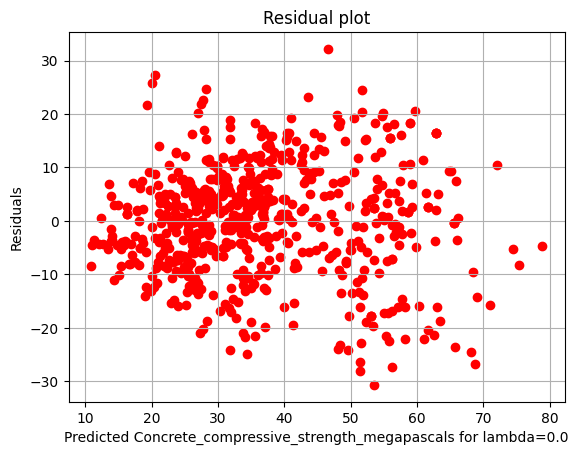

[array([11.54223052]), array([-4.27782833]), array([11.34568694]), array([-10.63300504]), array([-7.06497965]), array([-12.95245007]), array([10.94938057]), array([1.9133013]), array([0.20613281]), array([-2.50226664]), array([15.02756348]), array([7.83541887]), array([-3.9741334]), array([8.59119482]), array([-2.94799695]), array([-0.08437616]), array([1.92466241]), array([-2.9349176]), array([2.54612731]), array([19.25897481]), array([-12.3166984]), array([6.02907271]), array([-1.75756428]), array([7.37734564]), array([-0.95316978]), array([-5.35440534]), array([1.31019957]), array([-4.88723579]), array([0.44947483]), array([-6.28299842]), array([11.2242401]), array([-5.75796995]), array([9.40531868]), array([5.75370009]), array([8.76252459]), array([-6.0235851]), array([-14.16509935]), array([2.57779475]), array([9.07891752]), array([5.82383427]), array([-6.49926229]), array([2.08754448]), array([5.57245754]), array([3.31972027]), array([11.85830204]), array([2.54011829]), array([3.

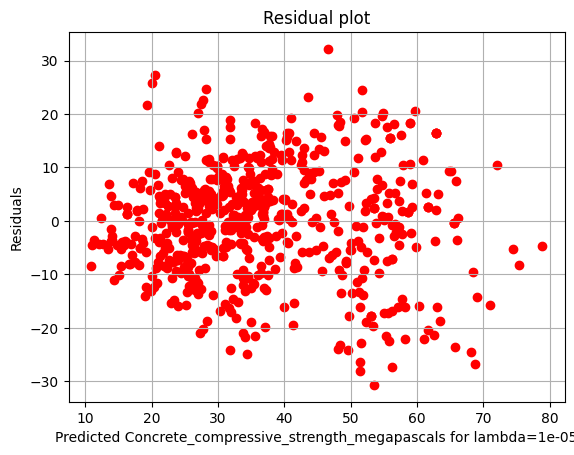

[array([11.54273545]), array([-4.27800675]), array([11.34610554]), array([-10.63305234]), array([-7.06467977]), array([-12.9520282]), array([10.94978794]), array([1.9129962]), array([0.2054639]), array([-2.50267419]), array([15.02757938]), array([7.83538188]), array([-3.97471215]), array([8.59112033]), array([-2.94822971]), array([-0.08470676]), array([1.9246176]), array([-2.93477864]), array([2.54569286]), array([19.25874272]), array([-12.31689071]), array([6.02848221]), array([-1.75741709]), array([7.37814123]), array([-0.95255073]), array([-5.35468343]), array([1.31001561]), array([-4.8864403]), array([0.44878433]), array([-6.28319684]), array([11.22349705]), array([-5.75668988]), array([9.40603228]), array([5.75321862]), array([8.76283162]), array([-6.02407108]), array([-14.16510352]), array([2.57835233]), array([9.07999176]), array([5.82554936]), array([-6.49954645]), array([2.08794318]), array([5.57304683]), array([3.31969901]), array([11.85849303]), array([2.5401962]), array([3.

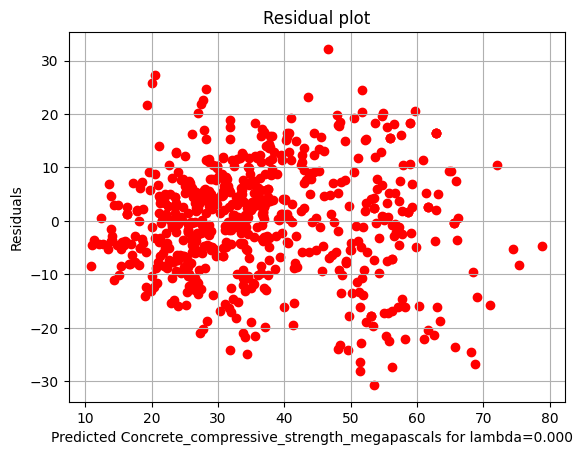

[array([11.54773706]), array([-4.27977413]), array([11.35025198]), array([-10.63352084]), array([-7.06170925]), array([-12.94784937]), array([10.95382322]), array([1.90997407]), array([0.19883792]), array([-2.5067113]), array([15.02773692]), array([7.83501548]), array([-3.980445]), array([8.59038242]), array([-2.95053533]), array([-0.08798156]), array([1.92417366]), array([-2.93340218]), array([2.5413894]), array([19.2564437]), array([-12.3187956]), array([6.022633]), array([-1.75595902]), array([7.38602207]), array([-0.94641868]), array([-5.35743802]), array([1.30819336]), array([-4.87856051]), array([0.44194457]), array([-6.28516238]), array([11.21613664]), array([-5.74400999]), array([9.41310088]), array([5.74844941]), array([8.765873]), array([-6.02888493]), array([-14.1651448]), array([2.58387549]), array([9.09063273]), array([5.84253838]), array([-6.5023612]), array([2.09189246]), array([5.57888408]), array([3.31948835]), array([11.86038489]), array([2.54096789]), array([3.889914

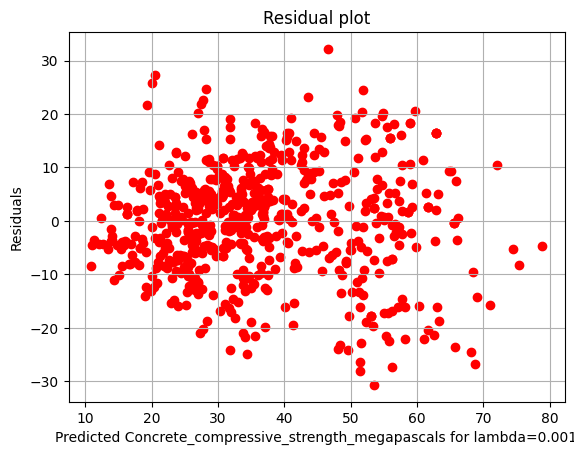

[array([11.59340411]), array([-4.29591113]), array([11.38811093]), array([-10.63779852]), array([-7.03458702]), array([-12.90969476]), array([10.9906671]), array([1.88238064]), array([0.13833976]), array([-2.54357183]), array([15.02917525]), array([7.83166998]), array([-4.03278841]), array([8.58364502]), array([-2.97158674]), array([-0.11788205]), array([1.9201203]), array([-2.92083439]), array([2.5020968]), array([19.23545266]), array([-12.3361882]), array([5.96922704]), array([-1.74264614]), array([7.45797769]), array([-0.89043031]), array([-5.38258873]), array([1.29155545]), array([-4.80661453]), array([0.37949449]), array([-6.30310868]), array([11.14893277]), array([-5.62823691]), array([9.47764038]), array([5.70490435]), array([8.7936422]), array([-6.07283763]), array([-14.16552128]), array([2.6343043]), array([9.18778969]), array([5.9976557]), array([-6.52806097]), array([2.12795123]), array([5.63218075]), array([3.31756498]), array([11.8776583]), array([2.54801399]), array([3.89

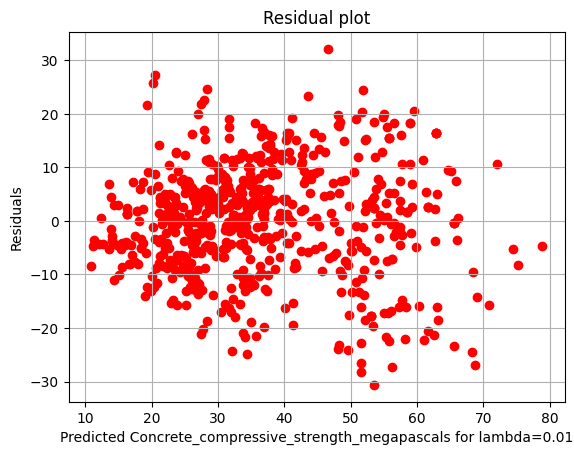

[array([11.82829647]), array([-4.37891302]), array([11.58284155]), array([-10.65980104]), array([-6.89507849]), array([-12.71344521]), array([11.18017748]), array([1.7404537]), array([-0.17283306]), array([-2.73316249]), array([15.03656997]), array([7.81445749]), array([-4.30201398]), array([8.54899051]), array([-3.07986732]), array([-0.27167917]), array([1.89927158]), array([-2.85618945]), array([2.29998944]), array([19.12748728]), array([-12.425653]), array([5.69453169]), array([-1.67416625]), array([7.8280867]), array([-0.60245067]), array([-5.51195254]), array([1.20597914]), array([-4.43655942]), array([0.05828143]), array([-6.39541818]), array([10.80326263]), array([-5.03275232]), array([9.80959988]), array([5.48092578]), array([8.9364803]), array([-6.29891446]), array([-14.16743537]), array([2.89368092]), array([9.68752771]), array([6.79550402]), array([-6.66023755]), array([2.3134233]), array([5.90631461]), array([3.3076712]), array([11.96650043]), array([2.58426551]), array([3.

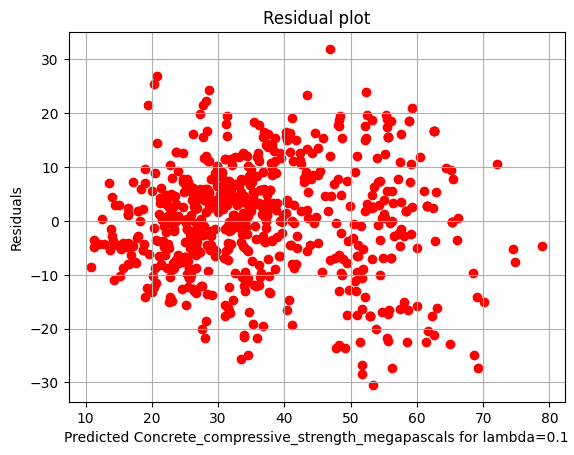

[array([12.07060453]), array([-4.46453229]), array([11.78371822]), array([-10.6824971]), array([-6.7511095]), array([-12.51103629]), array([11.37568408]), array([1.59408671]), array([-0.49374423]), array([-2.92865312]), array([15.04413401]), array([7.79661631]), array([-4.57960613]), array([8.51324048]), array([-3.19158234]), array([-0.43035817]), array([1.87776573]), array([-2.78947659]), array([2.09145446]), array([19.01618307]), array([-12.51802468]), array([5.4112148]), array([-1.60345129]), array([8.20986484]), array([-0.30540403]), array([-5.64538241]), array([1.11774218]), array([-4.05491726]), array([-0.27299395]), array([-6.49066434]), array([10.44665549]), array([-4.41854456]), array([10.15194858]), array([5.24986081]), array([9.08391689]), array([-6.53217177]), array([-14.16899699]), array([3.16109319]), array([10.20309605]), array([7.61834042]), array([-6.7963588]), array([2.50476415]), array([6.18906359]), array([3.29745131]), array([12.05805177]), array([2.62183369]), arr

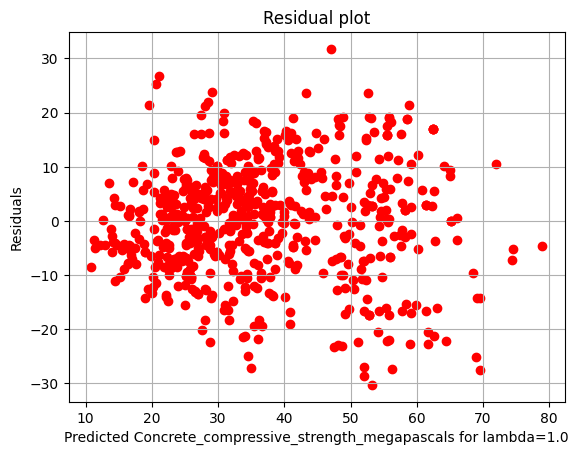

[array([12.0967344]), array([-4.47376184]), array([11.8053783]), array([-10.68494335]), array([-6.73552155]), array([-12.48924972]), array([11.3967818]), array([1.57834838]), array([-0.52825472]), array([-2.94963864]), array([15.04487796]), array([7.79459698]), array([-4.60939213]), array([8.50938366]), array([-3.20364723]), array([-0.44749922]), array([1.87544781]), array([-2.78225221]), array([2.06891408]), array([19.00425831]), array([-12.52807797]), array([5.38071946]), array([-1.5957438]), array([8.25101748]), array([-0.27339894]), array([-5.65975096]), array([1.10827285]), array([-4.01386917]), array([-0.3086299]), array([-6.50096045]), array([10.40817312]), array([-4.3523958]), array([10.18876481]), array([5.22492633]), array([9.09991559]), array([-6.5573738]), array([-14.16870358]), array([3.18975905]), array([10.25875313]), array([7.70684866]), array([-6.81078249]), array([2.52541271]), array([6.21951035]), array([3.29633384]), array([12.06781751]), array([2.62607749]), array(

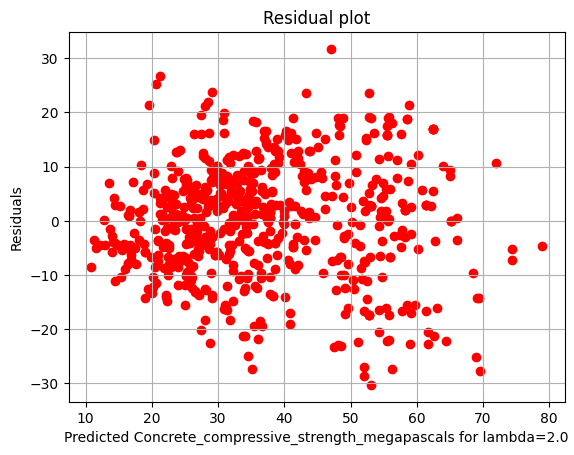

[array([12.11379969]), array([-4.47978076]), array([11.81951938]), array([-10.68653776]), array([-6.72517822]), array([-12.47512667]), array([11.41059907]), array([1.56818795]), array([-0.55054467]), array([-2.96309566]), array([15.04517752]), array([7.7930304]), array([-4.62845867]), array([8.50686059]), array([-3.21157309]), array([-0.45877066]), array([1.87393717]), array([-2.77745545]), array([2.05405663]), array([18.99667292]), array([-12.53488318]), array([5.36095068]), array([-1.59049764]), array([8.2778491]), array([-0.25256836]), array([-5.66908257]), array([1.10220772]), array([-3.98733929]), array([-0.3316752]), array([-6.50774981]), array([10.38297088]), array([-4.30941725]), array([10.21254499]), array([5.20859749]), array([9.11062281]), array([-6.57395827]), array([-14.16731231]), array([3.20803593]), array([10.2952571]), array([7.76407034]), array([-6.81953945]), array([2.53893681]), array([6.2392803]), array([3.29556405]), array([12.07391778]), array([2.62934931]), arra

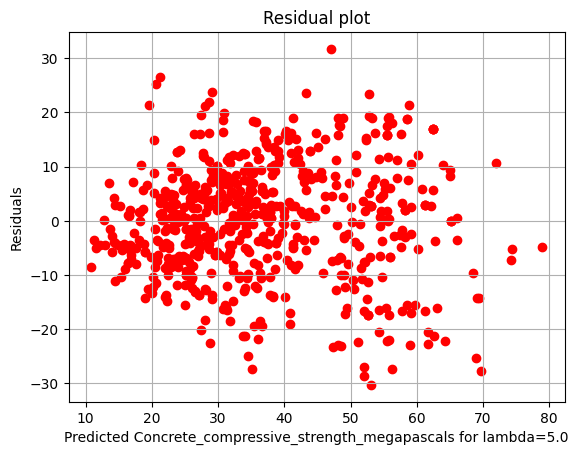

[array([12.11990929]), array([-4.48192084]), array([11.8245737]), array([-10.6871031]), array([-6.72120288]), array([-12.470247]), array([11.41561008]), array([1.56474787]), array([-0.55810914]), array([-2.9674981]), array([15.04497351]), array([7.79205553]), array([-4.63463879]), array([8.50595037]), array([-3.21448811]), array([-0.46293418]), array([1.87340174]), array([-2.7756068]), array([2.04850944]), array([18.99429597]), array([-12.5377197]), array([5.35411984]), array([-1.58826442]), array([8.28738002]), array([-0.2452307]), array([-5.6723358]), array([1.10023556]), array([-3.97830654]), array([-0.33954402]), array([-6.51028914]), array([10.37383187]), array([-4.29440297]), array([10.22061689]), array([5.20267759]), array([9.11488822]), array([-6.58010487]), array([-14.16480941]), array([3.21383622]), array([10.30858406]), array([7.78358273]), array([-6.82156651]), array([2.54384312]), array([6.2461665]), array([3.29522162]), array([12.07563777]), array([2.63135663]), array([3.

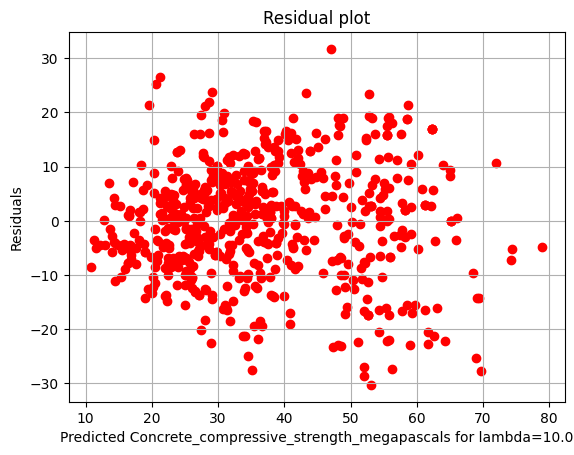

[array([12.12336387]), array([-4.48310399]), array([11.8274163]), array([-10.68741245]), array([-6.71845857]), array([-12.46780983]), array([11.41856046]), array([1.56316271]), array([-0.56162836]), array([-2.96923002]), array([15.04429105]), array([7.79074958]), array([-4.63695561]), array([8.50542339]), array([-3.21627762]), array([-0.46552211]), array([1.87310917]), array([-2.77432185]), array([2.04495697]), array([18.99356994]), array([-12.5400532]), array([5.35070723]), array([-1.58635433]), array([8.292632]), array([-0.24130051]), array([-5.67401554]), array([1.09948354]), array([-3.97404738]), array([-0.3432972]), array([-6.51192316]), array([10.36845255]), array([-4.28659328]), array([10.22437567]), array([5.19919552]), array([9.1180878]), array([-6.5839616]), array([-14.15973894]), array([3.21576109]), array([10.31658893]), array([7.79284002]), array([-6.82069269]), array([2.54673479]), array([6.24971053]), array([3.29490602]), array([12.07576469]), array([2.63401592]), array(

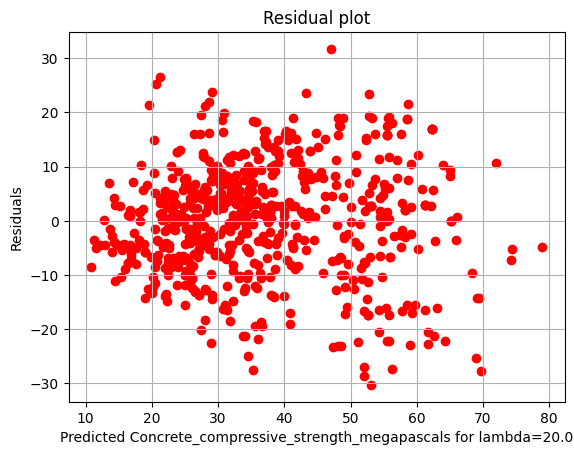

[array([12.12658056]), array([-4.48412875]), array([11.83001935]), array([-10.68766833]), array([-6.71447867]), array([-12.46646398]), array([11.42164231]), array([1.56271817]), array([-0.56273014]), array([-2.96867004]), array([15.04203233]), array([7.78737033]), array([-4.63573665]), array([8.50490002]), array([-3.21834929]), array([-0.46860215]), array([1.87286857]), array([-2.77243648]), array([2.04045533]), array([18.9946694]), array([-12.54431873]), array([5.3488202]), array([-1.58271885]), array([8.2971285]), array([-0.23826855]), array([-5.67512139]), array([1.0998233]), array([-3.97251353]), array([-0.34479412]), array([-6.51401364]), array([10.36283746]), array([-4.28127539]), array([10.2255662]), array([5.19556727]), array([9.1233262]), array([-6.5886456]), array([-14.14453524]), array([3.2136683]), array([10.32537943]), array([7.79636511]), array([-6.81408824]), array([2.54976315]), array([6.2520065]), array([3.29426141]), array([12.07346048]), array([2.64086442]), array([4

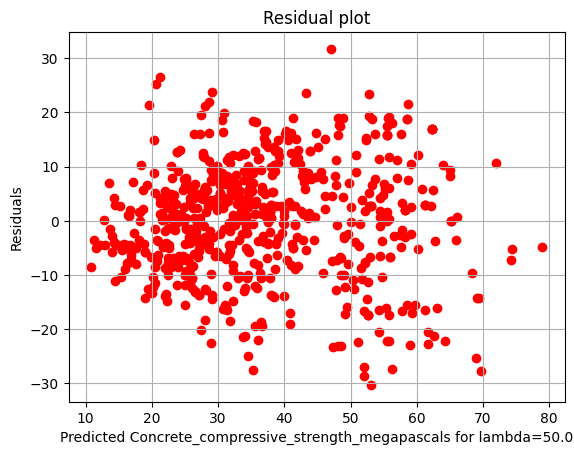

[array([12.12952217]), array([-4.48498432]), array([11.83235289]), array([-10.68785932]), array([-6.70931023]), array([-12.46622361]), array([11.42481627]), array([1.56341428]), array([-0.561402]), array([-2.96582729]), array([15.03823735]), array([7.78196546]), array([-4.63100669]), array([8.50439508]), array([-3.22067925]), array([-0.47213738]), array([1.87269136]), array([-2.76996872]), array([2.03505566]), array([18.99758851]), array([-12.55046319]), array([5.34848003]), array([-1.57740268]), array([8.3008164]), array([-0.23616918]), array([-5.6756412]), array([1.1012443]), array([-3.97371521]), array([-0.344017]), array([-6.51653716]), array([10.35705702]), array([-4.2785204]), array([10.22418037]), array([5.19183732]), array([9.13053771]), array([-6.59409876]), array([-14.11939765]), array([3.20759133]), array([10.33482057]), array([7.79412034]), array([-6.80184937]), array([2.55288889]), array([6.25302603]), array([3.29329295]), array([12.06876603]), array([2.65181645]), array([

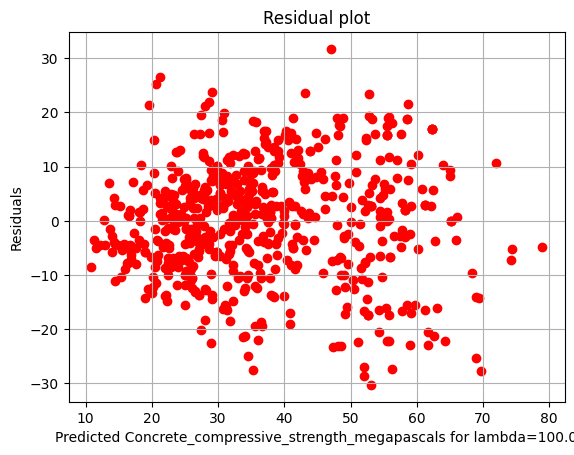

[array([12.13443887]), array([-4.48636353]), array([11.83622231]), array([-10.68811828]), array([-6.69964929]), array([-12.46648118]), array([11.4303463]), array([1.56529871]), array([-0.55761575]), array([-2.95952166]), array([15.03078512]), array([7.77141018]), array([-4.62071432]), array([8.50356589]), array([-3.22486615]), array([-0.4785236]), array([1.87245591]), array([-2.76533104]), array([2.02516599]), array([19.00377723]), array([-12.56222501]), array([5.34883913]), array([-1.56719037]), array([8.30669184]), array([-0.23310945]), array([-5.67618263]), array([1.10434]), array([-3.9774435]), array([-0.3412763]), array([-6.52116849]), array([10.34698251]), array([-4.27536573]), array([10.22022451]), array([5.18533582]), array([9.14419705]), array([-6.60398376]), array([-14.06993019]), array([3.19467466]), array([10.35141856]), array([7.78671042]), array([-6.77730627]), array([2.55833662]), array([6.25399853]), array([3.29141134]), array([12.05923611]), array([2.67324484]), array(

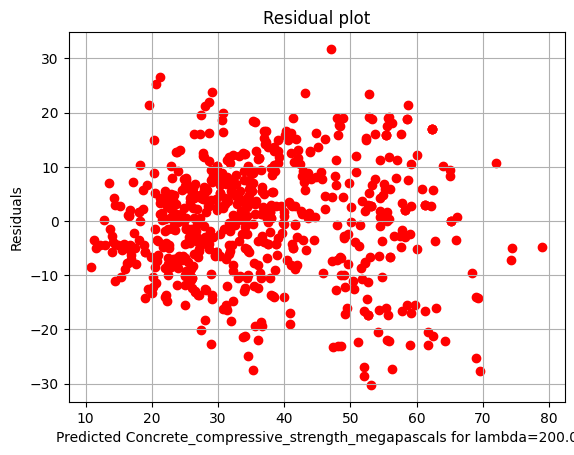

[array([12.14799785]), array([-4.49015321]), array([11.8468704]), array([-10.68853699]), array([-6.67214884]), array([-12.4677229]), array([11.44568565]), array([1.57097378]), array([-0.54582287]), array([-2.94085982]), array([15.00966914]), array([7.7412278]), array([-4.59056564]), array([8.50154339]), array([-3.23666877]), array([-0.49651144]), array([1.87210723]), array([-2.75198826]), array([1.99711548]), array([19.02217761]), array([-12.59584797]), array([5.35061856]), array([-1.53795211]), array([8.32261293]), array([-0.22504109]), array([-5.67741014]), array([1.11331268]), array([-3.98900145]), array([-0.33245383]), array([-6.53432152]), array([10.31899851]), array([-4.2681991]), array([10.20805526]), array([5.16724671]), array([9.18311276]), array([-6.63179975]), array([-13.9277197]), array([3.15692502]), array([10.39694611]), array([7.76319156]), array([-6.70664499]), array([2.57343087]), array([6.25599309]), array([3.28592775]), array([12.03190287]), array([2.73486338]), arra

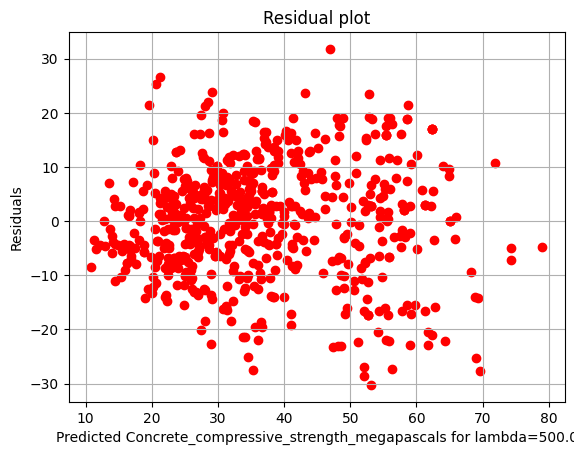

[array([12.20637341]), array([-4.50712011]), array([11.89280687]), array([-10.68522512]), array([-6.55454091]), array([-12.47209435]), array([11.50944917]), array([1.59216103]), array([-0.49549717]), array([-2.86239022]), array([14.9273493]), array([7.61675897]), array([-4.46765099]), array([8.49813346]), array([-3.28747913]), array([-0.57306762]), array([1.87582118]), array([-2.6923576]), array([1.87592214]), array([19.10531336]), array([-12.73807492]), array([5.35777972]), array([-1.41391239]), array([8.39056123]), array([-0.18979139]), array([-5.68313783]), array([1.14780136]), array([-4.0338907]), array([-0.29445054]), array([-6.59135302]), array([10.20190205]), array([-4.24287134]), array([10.15939956]), array([5.09092934]), array([9.34727542]), array([-6.74904621]), array([-13.33100405]), array([3.00050162]), array([10.57268464]), array([7.6644964]), array([-6.41514929]), array([2.63578712]), array([6.26360597]), array([3.26095594]), array([11.92314814]), array([2.9956876]), arra

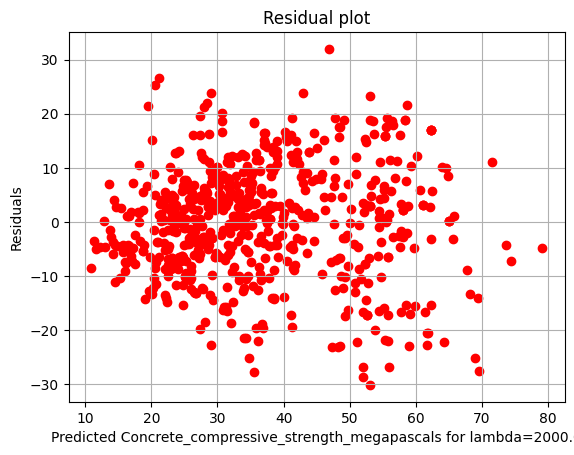

[array([12.40181258]), array([-4.57462818]), array([12.04850611]), array([-10.59872111]), array([-6.18640152]), array([-12.46323004]), array([11.6860515]), array([1.60370932]), array([-0.35537507]), array([-2.64861173]), array([14.79568117]), array([7.30322428]), array([-4.19253378]), array([8.5656264]), array([-3.45334928]), array([-0.80933516]), array([1.96517694]), array([-2.46737639]), array([1.47508203]), array([19.42368147]), array([-13.15622093]), array([5.36151809]), array([-1.04466529]), array([8.61422436]), array([-0.05740666]), array([-5.71297888]), array([1.19052874]), array([-4.08700587]), array([-0.18691666]), array([-6.78329249]), array([9.86570784]), array([-4.21997367]), array([10.07597382]), array([4.86182921]), array([9.82397389]), array([-7.09389638]), array([-11.66811079]), array([2.60644512]), array([10.84803189]), array([7.42354115]), array([-5.68625032]), array([2.80240832]), array([6.28482304]), array([3.15990698]), array([11.71606276]), array([3.75923093]), ar

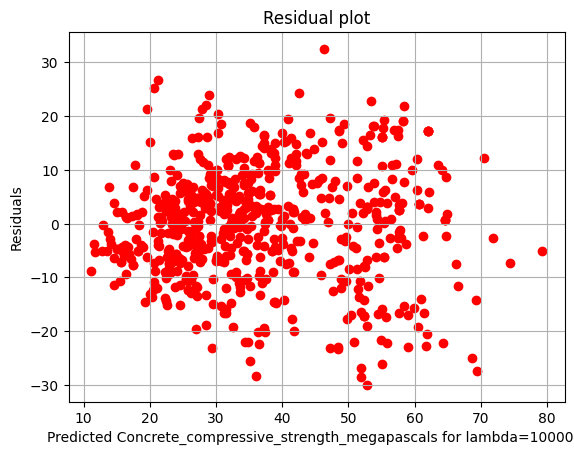

In [ ]:
beta_idx = 0
for lambda_ in lambdas:
  beta = betas[beta_idx]
  beta_idx += 1
  xlabel = 'Predicted Concrete_compressive_strength_megapascals for lambda='+str(lambda_)
  e_i_residuals_list = []
  y_pred_list = []

  for i in range(n_train):
    x_i = X_train[i,:] #access i-th row of X
    y_i = Y_train[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    e_i_residuals_list.append(e_i) #append the value of e_i to the list
    y_pred_list.append(y_pred_i)

  print(e_i_residuals_list)

  #plot the residuals e_i against the actual observations y_i
  plt.scatter(y_pred_list, e_i_residuals_list,color='r')
  plt.title("Residual plot")
  plt.xlabel(xlabel)
  plt.ylabel("Residuals")
  plt.grid()
  plt.show()

Note that the residual plots show some slight systematic behavior in the variance in the errors $e^i$. (Check this!)

This would imply that the current model might not be very apt to model the dependent variable. One should look for the underlying causes and then incorporate remedial measures to tackle this issue.

However for now, let us go ahead with other computations.

$\Large{\text{Coefficient of multiple determination for high dimensions}}$

Note that the description of coefficient of multiple determination for high dimensions is essentially the same as that for single dimension case.

Consider the term

$
\begin{align}
\Sigma_{YY} = \sum_{i=1}^{n} (y^i - \bar{y})^2.
\end{align}
$
This term $\Sigma_{YY}$ measures the $\textbf{observed total variation of the response}$, without considering the effect of predictor variables.

When we have access to a predictor variable, then the $\textbf{unexplained variation of response variable given the predictor variable}$ is given by the sum of squared residuals:

$
\begin{align}
L = \sum_{i=1}^{n} (e^i)^2.
\end{align}
$

Define the term:

$
\begin{align}
\text{SSD} = \Sigma_{YY}- L
\end{align}
$

as the difference between observed total variation of the response and the unexplained variation given the predictor. Hence this can be considered as $\textbf{variability explained by the regression on the predictor variable}$.

Assuming $\Sigma_{YY}\neq 0$, consider:

$
\begin{align}
\frac{\text{SSD}}{\Sigma_{YY}} = 1- \frac{L}{\Sigma_{YY}}.
\end{align}
$
Here the term $\frac{\text{SSD}}{\Sigma_{YY}}$ denotes the proportion of observed variability in the response variable which is explained by the regression on the predictor variable. From the equality, this proportion of observed variability given the predictor is simply $1$ minus the proportion of unexplained variability.

This term $\frac{\text{SSD}}{\Sigma_{YY}}$ denoting the proportion of observed variability which is explained by the predictor variable has a special name called $\textbf{coefficient of multiple determination}$ and is denoted by $R^2$.

It is known that $0\leq R^2 \leq 1$.

Let us compute $R^2$.

In [ ]:
#We shall now compute R^2 for auto Concrete_compressive_strength_megapascals data
R_sq_train = []
R_sq_val = []
MSE_train = []
MSE_val = []


#first we shall compute y_bar
y_bar_train = 0
for i in range(n_train): #access each row from the data set
  y_i_train = float(sac_train.iat[i,0]) #access element at Concrete_compressive_strength_megapascals column
  y_bar_train += y_i_train

y_bar_train /= n_train
print('y_bar_train',y_bar_train)


#Now we compute y_bar_val
y_bar_val = 0
for i in range(n_val): #access each row from the data set
  y_i_val = float(sac_val.iat[i,0]) #access element at Concrete_compressive_strength_megapascals column
  y_bar_val += y_i_val

y_bar_val /= n_val
print('y_bar_val',y_bar_val)


#Next we shall compute sigma_yy, which is the variance of y
sigma_yy_train = 0
for i in range(n_train): #access each row from the data set
  y_i_train = float(sac_train.iat[i,0]) #access element at Concrete_compressive_strength_megapascals column
  sigma_yy_train += (y_i_train-y_bar_train)**2

print('sigma_yy_train:', sigma_yy_train)

sigma_yy_val = 0
for i in range(n_val): #access each row from the data set
  y_i_val = float(sac_val.iat[i,0]) #access element at Concrete_compressive_strength_megapascals column
  sigma_yy_val += (y_i_val-y_bar_val)**2

print('sigma_yy_val:', sigma_yy_val)
print('\n_________________________\n')

#now we can compute sum of squared residuals
beta_idx = 0
for lambda_ in lambdas:
  beta = betas[beta_idx]
  beta_idx+=1
  sum_sq_residuals_train = 0
  sum_sq_residuals_val = 0
  for i in range(n_train): #access each row from the data set
    x_i_train = X_train[i,:] #access i-th row of X
    y_i_train = Y_train[i] #access i-th row of y

    y_pred_i_train = np.dot(x_i_train,beta) #compute the prediction obtained using the regression coefficients
    e_i_train = y_i_train - y_pred_i_train #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals_train += (e_i_train)**2

  for i in range(n_val): #access each row from the data set
    x_i_val = X_val[i,:] #access i-th row of X
    y_i_val = Y_val[i] #access i-th row of y

    y_pred_i_val = np.dot(x_i_val,beta) #compute the prediction obtained using the regression coefficients
    e_i_val = y_i_val - y_pred_i_val #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals_val += (e_i_val)**2


  print('lambda:',lambda_)
  print('sum of squared residuals for training data:', sum_sq_residuals_train)
  MSE_train.append(sum_sq_residuals_train/n_train)
  #Then we will compute the R^2 quantity
  R_sq = 1-sum_sq_residuals_train/sigma_yy_train
  R_sq_train.append(R_sq)
  print('R^2 for training data:',R_sq)

  print('sum of squared residuals for validation data:', sum_sq_residuals_val)
  MSE_val.append(sum_sq_residuals_val/n_val)

  #Then we will compute the R^2 quantity
  R_sq_vali = 1-sum_sq_residuals_val/sigma_yy_val
  R_sq_val.append(R_sq_vali)
  print('R^2 for validation data:',R_sq_vali)
  print('\n*******************************************************************\n')

y_bar_train 36.23333839150227
y_bar_val 34.8848484848485
sigma_yy_train: 189520.3350555386
sigma_yy_val: 36999.02332121212

_________________________

lambda: 0.0
sum of squared residuals for training data: [68376.62054217]
R^2 for training data: [0.63921222]
sum of squared residuals for validation data: [16813.60367829]
R^2 for validation data: [0.54556628]

*******************************************************************

lambda: 1e-05
sum of squared residuals for training data: [68376.6205463]
R^2 for training data: [0.63921222]
sum of squared residuals for validation data: [16813.56263792]
R^2 for validation data: [0.54556739]

*******************************************************************

lambda: 0.0001
sum of squared residuals for training data: [68376.62095507]
R^2 for training data: [0.63921222]
sum of squared residuals for validation data: [16813.19370423]
R^2 for validation data: [0.54557736]

*******************************************************************

lambd

We note that $R^2$ values are also not very impressive which would imply that the current linear regression model might not be very suitable for the task. Hence together with the residual plots and $R^2$ values, we can take appropriate measures.

**How to choose good value of Lambda-**

:**Graph between $R^2$ and $λ$ values for training and validation data-**

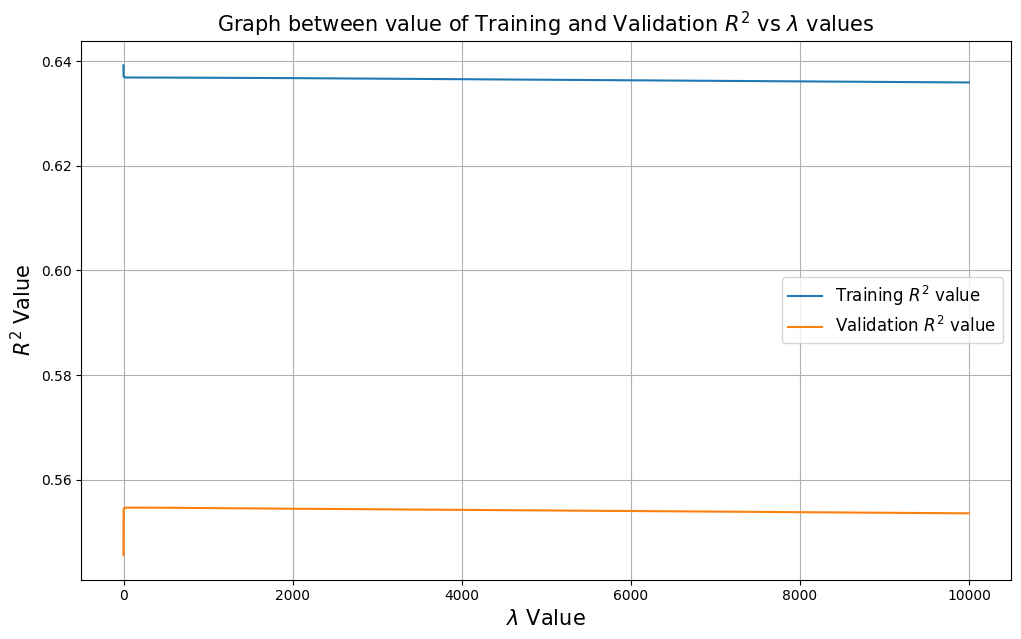

In [ ]:
plt.figure(figsize =(12,7))
plt.plot(lambdas,R_sq_train,label = "Training $R^2$ value")
plt.plot(lambdas,R_sq_val,label = "Validation $R^2$ value")
plt.ylabel("$R^2$ Value",fontsize = 15)
plt.xlabel("$\lambda$ Value",fontsize = 15)
plt.legend(fontsize = 12,loc = "best")
plt.title("Graph between value of Training and Validation $R^2$ vs $\lambda$ values",fontsize = 15)
plt.grid()
plt.show()

As we can see, increasing the value of $\lambda$ leads to lower $R^2$ values on train data which indicates that the unexplained variations captured by the regression parameters is not significant when compared to the variations captured by the mean $\bar{\mathbf{y}}$. However the behavior is slightly different on validation data. Thus though the model might be performing reasonably ok on train data, it is essential to check the generalizability on validation data as well.

**Graph between $MSE$ and $λ$ values for training and validation data-**

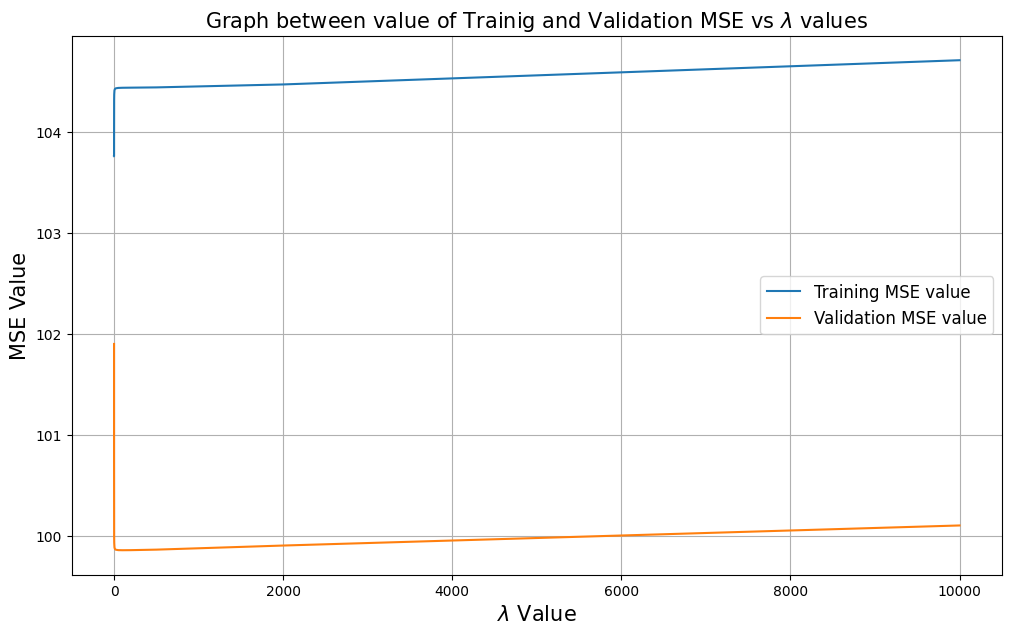

In [ ]:
plt.figure(figsize =(12,7))
plt.plot(lambdas,MSE_train,label = "Training MSE value")
plt.plot(lambdas,MSE_val,label = "Validation MSE value")
plt.ylabel("MSE Value",fontsize = 15)
plt.xlabel("$\lambda$ Value",fontsize = 15)
plt.legend(fontsize = 12,loc = "best")
plt.title("Graph between value of Trainig and Validation MSE vs $\lambda$ values",fontsize = 15)
plt.grid()
plt.show()

# **Doing K-Fold Cross Validatiion-**

In [ ]:
def compute_Rsquared_and_MSE(beta, X, Y):

  #first we shall compute y_bar
  y_bar = np.mean(Y)

  #Next we shall compute sigma_yy, which is the variance of y
  n=len(X)
  sigma_yy = 0
  for i in range(n): #access each row from the data set
    y_i = float(Y[i,0]) #access element at concrete_compressive_strength column
    sigma_yy += (y_i-y_bar)**2

  #now we can compute sum of squared residuals
  sum_sq_residuals = 0.
  for i in range(n): #access each row from the data set
    x_i = X[i,:] #access i-th row of X
    y_i = Y[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals += (e_i)**2


  #Then we will compute the R^2 quantity and MSE
  R_sq = 1-sum_sq_residuals/sigma_yy
  MSE = sum_sq_residuals/n
  #print('R^2 :',R_sq[0], ' MSE:',MSE[0])
  return R_sq[0], MSE[0] #This needs to be done since Y has shape (num_samples, 1)


In [ ]:
import scipy
from scipy import linalg
seed = 2000
sac_train_initial = sac_data.sample(frac=0.8,random_state=seed)
sac_test = sac_data.drop(sac_train_initial.index)

cols = list(range(1,9))
response_cols = [0]

X = sac_train_initial[sac_train_initial.columns[cols]].to_numpy()
y = sac_train_initial[sac_train_initial.columns[response_cols]].to_numpy()
print(y.shape)

#Creating k-folds in the training data (i.e. 0.8 fractions of the total data).
n_folds = 5
length = int(len(X)/n_folds) #length of each fold (except final fold possibly)
x_folds = []
y_folds=[]
for i in range(n_folds-1):
    x_folds += [X[i*length:(i+1)*length]]
    y_folds += [y[i*length:(i+1)*length]]

x_folds += [X[(n_folds-1)*length:len(X)]]
y_folds += [y[(n_folds-1)*length:len(X)]]


def X_data(fold):
    X_train = np.empty((0, X.shape[1]), np.float64) #Since we have X.shape[1] predictor variables
    X_val = []
    y_train = np.empty((0,y.shape[1]), np.float64)
    y_val = []
    for i in range(1,n_folds+1):
        if i==fold:
            X_val = x_folds[i-1]
            y_val = y_folds[i-1]
        else:
            X_train = np.append(X_train,x_folds[i-1],0)
            y_train = np.append(y_train,y_folds[i-1],0)
    return X_train,y_train, np.array(X_val), np.array(y_val)


lambdas = [0.0001, 0.001, 0.01, 0.1, 1,10,100,1000,2000,10000]

train_R2_lambdas = []
val_R2_lambdas = []

train_MSE_lambdas = []
val_MSE_lambdas = []

for lambda_ in lambdas:
  print('lambda:',lambda_)
  train_R2_foldwise = []
  val_R2_foldwise = []
  train_MSE_foldwise = []
  val_MSE_foldwise = []

  for fold in range(1,n_folds+1):
    X_train,Y_train,X_val,Y_val = X_data(fold)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
    X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1), dtype=X_val.dtype)))

    #evaluating beta for this particular lambda and fold
    XTX = np.matmul(np.transpose(X_train),X_train)
    Xy = np.matmul(np.transpose(X_train),Y_train)
    I = np.identity(X_train.shape[1])

    beta =scipy.linalg.solve( XTX+lambda_*I,Xy)
    train_R2, train_MSE = compute_Rsquared_and_MSE(beta, X_train, Y_train)
    train_R2_foldwise.append(train_R2)
    train_MSE_foldwise.append(train_MSE)

    val_R2, val_MSE = compute_Rsquared_and_MSE(beta, X_val, Y_val)
    val_R2_foldwise.append(val_R2)
    val_MSE_foldwise.append(val_MSE)


  train_R2_lambdas.append(np.mean(np.array(train_R2_foldwise)))
  train_MSE_lambdas.append(np.mean(np.array(train_MSE_foldwise)))
  val_R2_lambdas.append(np.mean(np.array(val_R2_foldwise)))
  val_MSE_lambdas.append(np.mean(np.array(val_MSE_foldwise)))
  print(f'\tMean train R2 Score for 5-fold CV: {train_R2_lambdas[-1]}')
  print(f'\tMean train MSE for 5-fold CV: {train_MSE_lambdas[-1]}')
  print(f'\tMean Validaion R2 Score for 5-fold CV: {val_R2_lambdas[-1]}')
  print(f'\tMean validation MSE for 5-fold CV: {val_MSE_lambdas[-1]}')



best_lambda_idx = np.argmax(np.array(val_R2_lambdas))
best_lambda = lambdas[best_lambda_idx]

print('best lambda based on average validation R2 score:', best_lambda)
print('******************************************************')
print('Using best lambda: ')
X_train = sac_train_initial[sac_train_initial.columns[cols]]
X_train = X_train.to_numpy()

X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
Y_train = sac_train_initial[sac_train_initial.columns[response_cols]].to_numpy()

X_test = sac_test[sac_test.columns[cols]]
X_test = X_test.to_numpy()
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1), dtype=X_test.dtype)))
Y_test = sac_test[sac_test.columns[response_cols]].to_numpy()


XTX = np.matmul(np.transpose(X_train),X_train)
Xy = np.matmul(np.transpose(X_train),Y_train)
I = np.identity(X_train.shape[1])

beta =scipy.linalg.solve( XTX+best_lambda*I,Xy)
print('Final beta:',beta)
print('***************')

train_R2, train_MSE = compute_Rsquared_and_MSE(beta, X_train, Y_train)

test_R2, test_MSE = compute_Rsquared_and_MSE(beta, X_test, Y_test)

print('Train R^2 :', train_R2, ' Train MSE:', train_MSE)
print('Test R^2 :', test_R2, ' Test MSE:', test_MSE)

(824, 1)
lambda: 0.0001
	Mean train R2 Score for 5-fold CV: 0.6224340509669883
	Mean train MSE for 5-fold CV: 105.04029552843994
	Mean Validaion R2 Score for 5-fold CV: 0.6019178880391698
	Mean validation MSE for 5-fold CV: 109.83305856784087
lambda: 0.001
	Mean train R2 Score for 5-fold CV: 0.6224340045721667
	Mean train MSE for 5-fold CV: 105.04030854406331
	Mean Validaion R2 Score for 5-fold CV: 0.6019338161126437
	Mean validation MSE for 5-fold CV: 109.82889319772653
lambda: 0.01
	Mean train R2 Score for 5-fold CV: 0.6224301259417722
	Mean train MSE for 5-fold CV: 105.04139658083007
	Mean Validaion R2 Score for 5-fold CV: 0.6020741750026145
	Mean validation MSE for 5-fold CV: 109.79220306530542
lambda: 0.1
	Mean train R2 Score for 5-fold CV: 0.6223191323813896
	Mean train MSE for 5-fold CV: 105.07252137532655
	Mean Validaion R2 Score for 5-fold CV: 0.6026619543526804
	Mean validation MSE for 5-fold CV: 109.63900556123959
lambda: 1
	Mean train R2 Score for 5-fold CV: 0.6220659751031

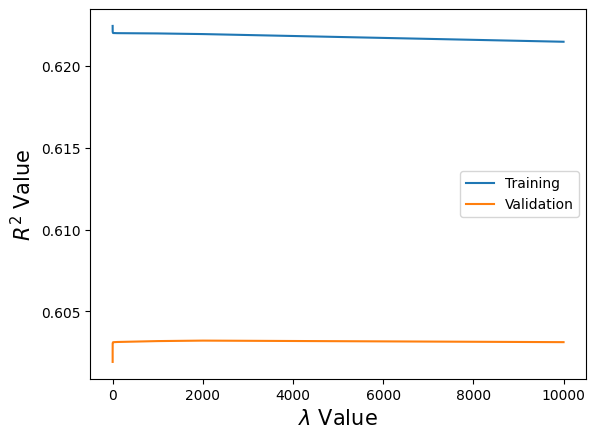

In [ ]:
plt.plot(lambdas, train_R2_lambdas,label = "Training")
plt.plot(lambdas, val_R2_lambdas,label = "Validation")
plt.ylabel("$R^2$ Value",fontsize = 15)
plt.xlabel("$\lambda$ Value",fontsize = 15)
plt.legend()
plt.show()

# **Taking the lambda value as 2000**

In [ ]:
X_train_full = sac_train_initial[sac_train_initial.columns[cols]]
X_train_full = X_train_full.to_numpy()
X_train_full = np.hstack((X_train_full, np.ones((X_train_full.shape[0], 1), dtype=X_train_full.dtype)))
Y_train_full = sac_train_initial[sac_train_initial.columns[response_cols]].to_numpy()

**Training on full training dataset-**

In [ ]:
best_lambda

2000

In [ ]:
XTX = np.matmul(np.transpose(X_train_full),X_train_full)
lambda_ = best_lambda
Xy = np.matmul(np.transpose(X_train_full),Y_train_full)
I = np.identity(XTX.shape[0])
beta =scipy.linalg.solve(XTX+lambda_*I,Xy)
print('lambda:',lambda_)
print('beta:',beta)
print('***************')

lambda: 2000
beta: [[ 0.11497573]
 [ 0.09637674]
 [ 0.08347726]
 [-0.18786689]
 [ 0.18680116]
 [ 0.01038651]
 [ 0.01214123]
 [ 0.11707524]
 [-0.0013543 ]]
***************


**Checking performance on test datset-**

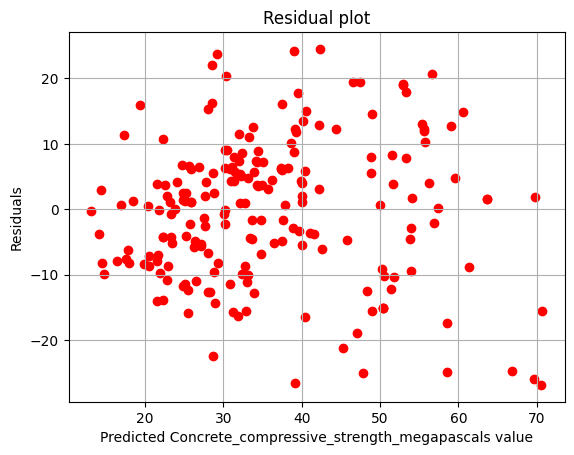

In [ ]:
e_i_residuals_list = []
y_pred_list = []
n = len(sac_test.index)
for i in range(n):
  x_i = X_test[i,:] #access i-th row of X
  y_i = Y_test[i] #access i-th row of y

  y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list.append(e_i) #append the value of e_i to the list
  y_pred_list.append(y_pred_i)
#plot the residuals e_i against the actual observations y_i
plt.scatter(y_pred_list, e_i_residuals_list,color='r')
plt.title("Residual plot")
plt.xlabel("Predicted Concrete_compressive_strength_megapascals value")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [ ]:
#first we shall compute y_bar
y_bar = 0
for i in range(n): #access each row from the data set
  y_i = float(sac_test.iat[i,0]) #access element at concrete_compressive_strength column
  y_bar += y_i

y_bar /= n
print('y_bar',y_bar)

#Next we shall compute sigma_yy, which is the variance of y
sigma_yy = 0
for i in range(n): #access each row from the data set
  y_i = float(sac_test.iat[i,0]) #access element at concrete_compressive_strength column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#now we can compute sum of squared residuals

sum_sq_residuals = 0
for i in range(n): #access each row from the data set
  x_i = X_test[i,:] #access i-th row of X
  y_i = Y_test[i] #access i-th row of y

  y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  sum_sq_residuals += (e_i)**2

print('lambda:',lambda_)
print('sum of squared residuals:', sum_sq_residuals)

#Then we will compute the R^2 quantity
R_sq = 1-sum_sq_residuals/sigma_yy
print('R^2:',R_sq)
print('*********************')

y_bar 35.674611650485446
sigma_yy: 57800.252718932046
lambda: 2000
sum of squared residuals: [23664.65324279]
R^2: [0.59057872]
*********************


$\Large{\text{References:}}$



1.   Olive J. David, $\textit{Linear Regression}$. Springer International Publishing,  2017.
2.   Sanford Weisberg. $\textit{Applied Linear Regression}$. John Wiley $\&$ Sons, Inc., Hoboken, New Jersey, 4-th Edition, 2014.

